# Convolution Neural Network: CIFAR-10 Dataset

This notebook uses the classic [CIFAR-10](https://www.cs.toronto.edu/~kriz/cifar.html) dataset, which is a labeled subset of the 80 million tiny images dataset. It was collected by Alex Krizhevsky, Vinod Nair, and Geoffrey Hinton.

In [102]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import time

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import regularizers
from tensorflow.keras.callbacks import LearningRateScheduler
from tensorflow.keras import regularizers
from tensorflow.keras.preprocessing.image import ImageDataGenerator

## The CIFAR-10 dataset

### Get the data
CIFAR-10 dataset is provided by Keras directly. The following codes show how to load it.

In [106]:
# the data, shuffled and split between train and test sets
from tensorflow.keras.datasets import cifar10
(X_train_pre, y_train_pre), (X_test_pre, y_test_pre) = cifar10.load_data()

### Visualize data

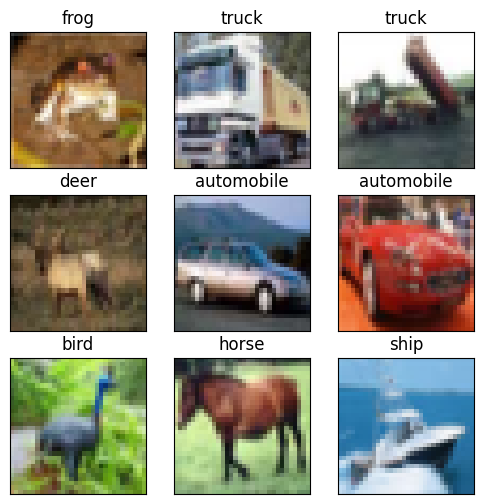

In [109]:
label_lst = ["airplane", "automobile", "bird", "cat", "deer",
            "dog", "frog", "horse", "ship", "truck"]
fig = plt.figure(figsize=(6, 6))
col = 3
row = 3
for i in range(col*row):
    label = label_lst[y_train_pre[i][0]]
    img = X_train_pre[i,:]
    fig.add_subplot(row, col, i+1)
    plt.title('{}'.format(label))
    plt.xticks([])
    plt.yticks([])
    plt.imshow(img, cmap='gray')
plt.show()

### convert class vectors to binary class matrices
convert class label to one-hot coding

In [112]:
num_classes = 10 # 0-9
y_train = keras.utils.to_categorical(y_train_pre, num_classes)
y_test = keras.utils.to_categorical(y_test_pre, num_classes)
# the first 9 samples are 6, 9,9,4,1,1,2,7,8
y_train[:9,]

array([[0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.]])

### Normalize the features

In [115]:
img_rows, img_cols = 32, 32
X_train = X_train_pre.astype('float32')
X_test = X_test_pre.astype('float32')
mean = np.mean(X_train,axis=(0,1,2,3))
std = np.std(X_test,axis=(0,1,2,3))
X_train = (X_train-mean)/(std+1e-7)
X_test = (X_test-mean)/(std+1e-7)
#X_train /= 255.
#X_test /= 255.

validation_split = 0.2
index = np.random.permutation(X_train.shape[0])
train_idx = int(X_train.shape[0]*validation_split)
X_val, X_train = X_train[index[:train_idx]], X_train[index[train_idx:]]
y_val, y_train = y_train[index[:train_idx]], y_train[index[train_idx:]]

print('training data shape:', X_train.shape)
print('{} train samples, {} validation samples, {} test samples'\
      .format(X_train.shape[0], X_val.shape[0], X_test.shape[0]))

# validation split changeable

training data shape: (40000, 32, 32, 3)
40000 train samples, 10000 validation samples, 10000 test samples


## The model

### Build the model

please fill

In [119]:
model = keras.Sequential()
model.add(layers.Input(X_train.shape[1:]))
model.add(layers.Conv2D(filters = 10, kernel_size=(5, 5), activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Conv2D(filters = 20, kernel_size=(5, 5), activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(100, activation='relu'))
model.add(layers.Dense(num_classes, activation='softmax'))

optimizer = keras.optimizers.Adam(0.0005)
model.compile(loss='categorical_crossentropy',
              optimizer=optimizer,
              metrics=['accuracy'])

### Inspect the model

Use the `.summary` method to print a simple description of the model

In [122]:
model.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_17 (Conv2D)              │ (None, 28, 28, 10)     │           760 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_14 (MaxPooling2D) │ (None, 14, 14, 10)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_18 (Conv2D)              │ (None, 10, 10, 20)     │         5,020 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_15 (MaxPooling2D) │ (None, 5, 5, 20)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_7 (Flatten)             │ (None, 500)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 100)            │        50,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 56,890 (222.23 KB)

 Trainable params: 56,890 (222.23 KB)

 Non-trainable params: 0 (0.00 B)

### Data Augmentation

### Train the model

In [126]:
optimizer = keras.optimizers.Adam(0.001)
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

# Optimizer Changeable

In [128]:
# Display training progress by printing a single dot for each completed epoch
class PrintLoss(keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs):
        # calculate training time
        t = time.monotonic() - self.time
        print('| Epoch {:2} | training time {:6.2f}s | train loss {:6.2f} | validation loss {:6.2f}'
              .format(epoch, t, logs['loss'], logs['val_loss']))

    def on_epoch_begin(self, epoch, logs):
        if epoch == 0: self.time = time.monotonic()

EPOCHS = 20
BATCH = 64

early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=2)
history = model.fit(X_train, y_train, batch_size=BATCH,
                              epochs=EPOCHS, verbose=1, validation_data=(X_val, y_val),
                              callbacks=[early_stop])

# Epochs, Batch Changeable

Epoch 1/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.3607 - loss: 1.7590 - val_accuracy: 0.5343 - val_loss: 1.3297
Epoch 2/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.5505 - loss: 1.2678 - val_accuracy: 0.5780 - val_loss: 1.2065
Epoch 3/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.6018 - loss: 1.1352 - val_accuracy: 0.6151 - val_loss: 1.0954
Epoch 4/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.6368 - loss: 1.0322 - val_accuracy: 0.6338 - val_loss: 1.0531
Epoch 5/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.6670 - loss: 0.9459 - val_accuracy: 0.6476 - val_loss: 1.0122
Epoch 6/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.6905 - loss: 0.8886 - val_accuracy: 0.6536 - val_loss: 1.0240
Epoch 7/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.7074 - loss: 0.8417 - val_accuracy: 0.6519 - val_loss: 1.0106
Epoch 8/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.7242 - loss: 0.7886 - val_accuracy: 0.

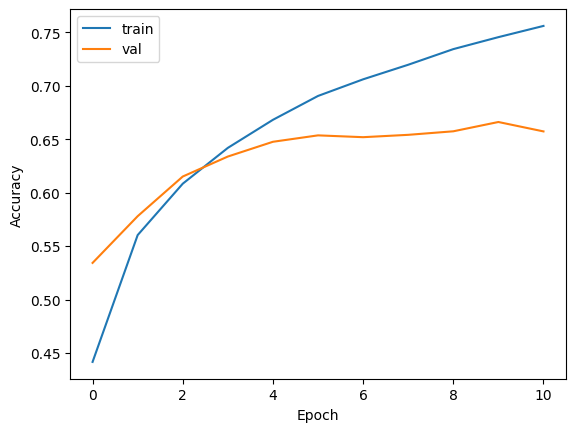

In [130]:
def plot_history(history):
    hist = pd.DataFrame(history.history)
    hist['epoch'] = history.epoch
    hist.tail()

    plt.figure()
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.plot(hist['epoch'], hist['accuracy'], label="train")
    plt.plot(hist['epoch'], hist['val_accuracy'], label="val")
    plt.legend()
    plt.show()

plot_history(history)

### Make predictions

Calculate the classification accuracy for testing set

In [134]:
_, acc = model.evaluate(X_test, y_test, batch_size=128, verbose=0)

print("Testing set accuracy: {:.2f}%".format(acc*100))

Testing set accuracy: 65.24%


Make predictions for testing data

In [136]:
y_pred = np.argmax(model.predict(X_test),axis=1)
y_pred[:9]

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


array([3, 1, 1, 0, 6, 6, 9, 2, 3])

Visualize predictions

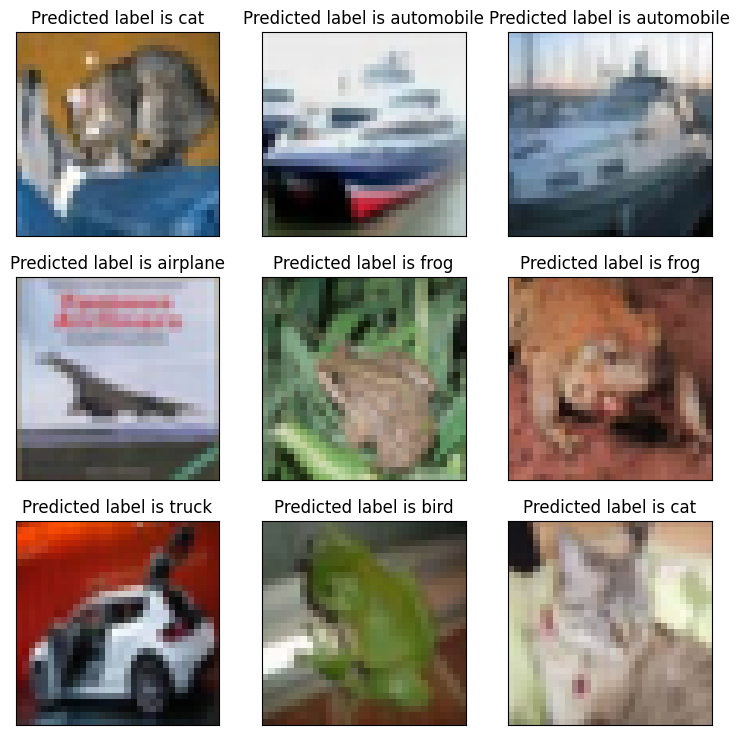

In [139]:
fig = plt.figure(figsize=(9, 9))
col = 3
row = 3
for i in range(col*row):
    pred = label_lst[y_pred[i]]
    img = X_test_pre[i,:]
    fig.add_subplot(row, col, i+1)
    plt.title('Predicted label is {}'.format(pred))
    plt.xticks([])
    plt.yticks([])
    plt.imshow(img, cmap='gray')
plt.show()